# Breast cancer part 1 #

import the libraries

In [1]:
# import relevant modules
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sn
import scipy.stats as stats
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Settings
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

Load the data from csv file

In [2]:
df_breast=pd.read_csv("breast-cancer.csv", header=None)

In [3]:
df_breast.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
with open("field_names.txt") as file:
    lines = file.readlines()
    col_names = [line.rstrip() for line in lines]

In [5]:
col_names

['ID',
 'diagnosis',
 'radius_mean',
 'radius_sd_error',
 'radius_worst',
 'texture_mean',
 'texture_sd_error',
 'texture_worst',
 'perimeter_mean',
 'perimeter_sd_error',
 'perimeter_worst',
 'area_mean',
 'area_sd_error',
 'area_worst',
 'smoothness_mean',
 'smoothness_sd_error',
 'smoothness_worst',
 'compactness_mean',
 'compactness_sd_error',
 'compactness_worst',
 'concavity_mean',
 'concavity_sd_error',
 'concavity_worst',
 'concave_points_mean',
 'concave_points_sd_error',
 'concave_points_worst',
 'symmetry_mean',
 'symmetry_sd_error',
 'symmetry_worst',
 'fractal_dimension_mean',
 'fractal_dimension_sd_error',
 'fractal_dimension_worst']

In [6]:
col_names[0]

'ID'

In [7]:
len(col_names)

32

Rename the columns

In [8]:
df_breast.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64')

In [9]:
df_breast.columns=col_names

In [10]:
df_breast.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,area_sd_error,area_worst,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst,concavity_mean,concavity_sd_error,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
df_breast.describe()

,ID,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,area_sd_error,area_worst,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst,concavity_mean,concavity_sd_error,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Check the null values inside the dataframe

In [12]:
df_breast.isnull().sum()

ID                            0
diagnosis                     0
radius_mean                   0
radius_sd_error               0
radius_worst                  0
texture_mean                  0
texture_sd_error              0
texture_worst                 0
perimeter_mean                0
perimeter_sd_error            0
perimeter_worst               0
area_mean                     0
area_sd_error                 0
area_worst                    0
smoothness_mean               0
smoothness_sd_error           0
smoothness_worst              0
compactness_mean              0
compactness_sd_error          0
compactness_worst             0
concavity_mean                0
concavity_sd_error            0
concavity_worst               0
concave_points_mean           0
concave_points_sd_error       0
concave_points_worst          0
symmetry_mean                 0
symmetry_sd_error             0
symmetry_worst                0
fractal_dimension_mean        0
fractal_dimension_sd_error    0
fractal_

There is no null values. Hence, it is good to go.

We need to drop unnecessary column. such as 'ID' in this dataframe. but first, we need to confirm there is no duplicates in the column or else it cant be dropped

In [13]:
df_breast['ID'].duplicated().any()

False

Hence, there is no duplicate. hence, it is save to be dropped

In [14]:
df_breast=df_breast.drop(['ID'], axis=1)

Find the mean for each parameters for benign tumours (B) and malignant tumors(M) 

In [15]:
tumor_mean=df_breast.groupby("diagnosis").mean()

In [16]:
tumor_mean

,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,area_sd_error,area_worst,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst,concavity_mean,concavity_sd_error,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


Find the median for each parameters for benign tumours (B) and malignant tumors(M)

In [17]:
tumor_median=df_breast.groupby("diagnosis").median()

In [18]:
tumor_median

,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,area_sd_error,area_worst,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst,concavity_mean,concavity_sd_error,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
B,12.200,17.39,78.18,458.4,0.09076,0.07529,0.03709,0.02344,0.1714,0.061540,0.2575,1.1080,1.8510,19.630,0.006530,0.01631,0.018400,0.009061,0.01909,0.002808,13.35,22.820,86.92,547.4,0.12540,0.16980,0.1412,0.07431,0.2687,0.07712
M,17.325,21.46,114.20,932.0,0.10220,0.13235,0.15135,0.08628,0.1899,0.061575,0.5472,1.1025,3.6795,58.455,0.006209,0.02859,0.037125,0.014205,0.01770,0.003739,20.59,28.945,138.00,1303.0,0.14345,0.35635,0.4049,0.18200,0.3103,0.08760


Compute the mean and median smoothness and compactness for benign and malignant tumors - do they differ? Explain how you would identify this.

The mean:

In [19]:
df_tumor_mean=tumor_mean.loc[:, ["smoothness_mean" , "smoothness_sd_error", "smoothness_worst","compactness_mean" , "compactness_sd_error", "compactness_worst"]]

In [20]:
df_tumor_mean

,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst
diagnosis,,,,,,
B,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858
M,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060


Find the difference for each column:

In [21]:
df_tumor_mean.diff(axis=0, periods=1)

,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst
diagnosis,,,,,,
B,NaN,NaN,NaN,NaN,NaN,NaN
M,2.323608,51.537257,-0.000416,0.010843,0.015827,0.005203


The median:

In [22]:
df_tumor_median=tumor_median.loc[:, ["smoothness_mean" , "smoothness_sd_error", "smoothness_worst","compactness_mean" , "compactness_sd_error", "compactness_worst"]]

In [23]:
df_tumor_median

,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst
diagnosis,,,,,,
B,1.8510,19.630,0.006530,0.01631,0.018400,0.009061
M,3.6795,58.455,0.006209,0.02859,0.037125,0.014205


In [24]:
df_tumor_median.diff(axis=0, periods=1)

,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst
diagnosis,,,,,,
B,NaN,NaN,NaN,NaN,NaN,NaN
M,1.8285,38.825,-0.000321,0.01228,0.018725,0.005144


# Exploratory Analysis

## Find the importance of attributes

### Method 1 : using pearson correlation

In [25]:
df_breast.loc[df_breast["diagnosis"]=='M', "tumor"]=1

In [26]:
df_breast.loc[df_breast["diagnosis"]=='B', "tumor"]=0

In [27]:
df_breast

,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,area_sd_error,area_worst,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst,concavity_mean,concavity_sd_error,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst,tumor
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1.0
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1.0
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1.0
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1.0
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1.0
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1.0
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1.0
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1.0


In [28]:
breast_corr=df_breast.loc[:, df_breast.columns.difference(['diagnosis'])]

In [29]:
breast_corr

,area_mean,area_sd_error,area_worst,compactness_mean,compactness_sd_error,compactness_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,concavity_mean,concavity_sd_error,concavity_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,radius_mean,radius_sd_error,radius_worst,smoothness_mean,smoothness_sd_error,smoothness_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,texture_mean,texture_sd_error,texture_worst,tumor
0,0.07871,1.0950,0.9053,0.04904,0.05373,0.01587,17.33,184.60,2019.0,0.03003,0.006193,25.380,0.2654,0.4601,0.11890,0.30010,0.14710,0.2419,17.99,10.38,122.80,8.589,153.40,0.006399,0.16220,0.66560,0.7119,1001.0,0.11840,0.27760,1.0
1,0.05667,0.5435,0.7339,0.01308,0.01860,0.01340,23.41,158.80,1956.0,0.01389,0.003532,24.990,0.1860,0.2750,0.08902,0.08690,0.07017,0.1812,20.57,17.77,132.90,3.398,74.08,0.005225,0.12380,0.18660,0.2416,1326.0,0.08474,0.07864,1.0
2,0.05999,0.7456,0.7869,0.04006,0.03832,0.02058,25.53,152.50,1709.0,0.02250,0.004571,23.570,0.2430,0.3613,0.08758,0.19740,0.12790,0.2069,19.69,21.25,130.00,4.585,94.03,0.006150,0.14440,0.42450,0.4504,1203.0,0.10960,0.15990,1.0
3,0.09744,0.4956,1.1560,0.07458,0.05661,0.01867,26.50,98.87,567.7,0.05963,0.009208,14.910,0.2575,0.6638,0.17300,0.24140,0.10520,0.2597,11.42,20.38,77.58,3.445,27.23,0.009110,0.20980,0.86630,0.6869,386.1,0.14250,0.28390,1.0
4,0.05883,0.7572,0.7813,0.02461,0.05688,0.01885,16.67,152.20,1575.0,0.01756,0.005115,22.540,0.1625,0.2364,0.07678,0.19800,0.10430,0.1809,20.29,14.34,135.10,5.438,94.44,0.011490,0.13740,0.20500,0.4000,1297.0,0.10030,0.13280,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.05623,1.1760,1.2560,0.02891,0.05198,0.02454,26.40,166.10,2027.0,0.01114,0.004239,25.450,0.2216,0.2060,0.07115,0.24390,0.13890,0.1726,21.56,22.39,142.00,7.673,158.70,0.010300,0.14100,0.21130,0.4107,1479.0,0.11100,0.11590,1.0
565,0.05533,0.7655,2.4630,0.02423,0.03950,0.01678,38.25,155.00,1731.0,0.01898,0.002498,23.690,0.1628,0.2572,0.06637,0.14400,0.09791,0.1752,20.13,28.25,131.20,5.203,99.04,0.005769,0.11660,0.19220,0.3215,1261.0,0.09780,0.10340,1.0
566,0.05648,0.4564,1.0750,0.03731,0.04730,0.01557,34.12,126.70,1124.0,0.01318,0.003892,18.980,0.1418,0.2218,0.07820,0.09251,0.05302,0.1590,16.60,28.08,108.30,3.425,48.55,0.005903,0.11390,0.30940,0.3403,858.1,0.08455,0.10230,1.0
567,0.07016,0.7260,1.5950,0.06158,0.07117,0.01664,39.42,184.60,1821.0,0.02324,0.006185,25.740,0.2650,0.4087,0.12400,0.35140,0.15200,0.2397,20.60,29.33,140.10,5.772,86.22,0.006522,0.16500,0.86810,0.9387,1265.0,0.11780,0.27700,1.0


In [30]:
cor= breast_corr.corr(method='pearson')['tumor'].sort_values(ascending=False)
print(cor)

tumor                         1.000000
fractal_dimension_mean        0.793566
concave_points_sd_error       0.782914
perimeter_sd_error            0.776614
concavity_worst               0.776454
radius_worst                  0.742636
concave_points_worst          0.733825
radius_mean                   0.730029
texture_mean                  0.708984
perimeter_mean                0.696360
symmetry_worst                0.659610
texture_worst                 0.596534
symmetry_sd_error             0.590998
area_sd_error                 0.567134
smoothness_mean               0.556141
smoothness_sd_error           0.548236
concave_points_mean           0.456903
symmetry_mean                 0.421465
fractal_dimension_sd_error    0.416294
radius_sd_error               0.415185
compactness_worst             0.408042
texture_sd_error              0.358560
perimeter_worst               0.330499
fractal_dimension_worst       0.323872
compactness_mean              0.292999
compactness_sd_error     

#### Find the importance features (by using random forest)

Probably the easiest way to examine feature importances is by examining the model’s coefficients. For example, both linear and logistic regression boils down to an equation in which coefficients (importances) are assigned to each input value.

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [32]:
X = breast_corr.drop('tumor', axis=1)
y = breast_corr['tumor']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

### Method 2 : Obtain importances from coefficients 

In [60]:
#using logistic regression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

In [63]:
importances.head()

,Attribute,Importance
6,concave_points_mean,1.295717
1,area_sd_error,1.285016
13,fractal_dimension_sd_error,1.219636
16,perimeter_sd_error,1.093763
26,symmetry_worst,1.007485


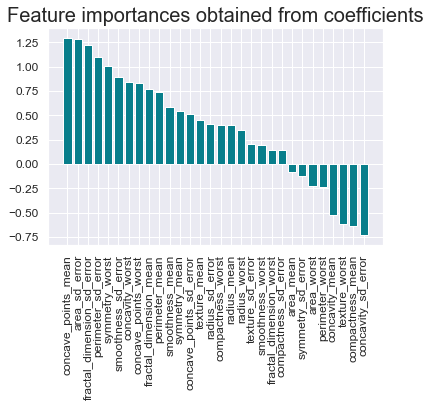

In [64]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

### Method 3: Obtain importances from a tree-based model

In [36]:
!pip install xgboost

In [49]:
from xgboost import XGBClassifier

In [65]:
#using Using XGBClassifier
model = XGBClassifier()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

[19:15:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [66]:
importances.head()

,Attribute,Importance
16,perimeter_sd_error,0.410556
12,fractal_dimension_mean,0.264868
11,concavity_worst,0.065090
7,concave_points_sd_error,0.037705
8,concave_points_worst,0.031605


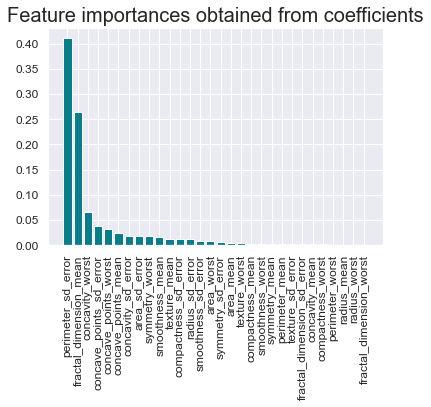

In [67]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

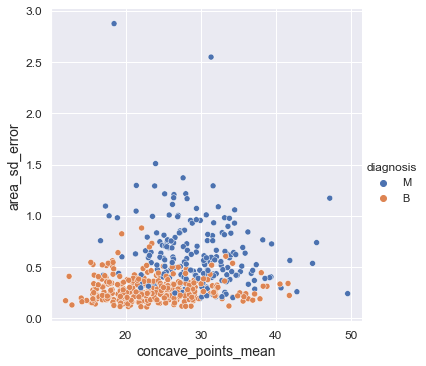

In [74]:
sns.relplot(x="concave_points_mean", y="area_sd_error", hue="diagnosis", data=df_breast)

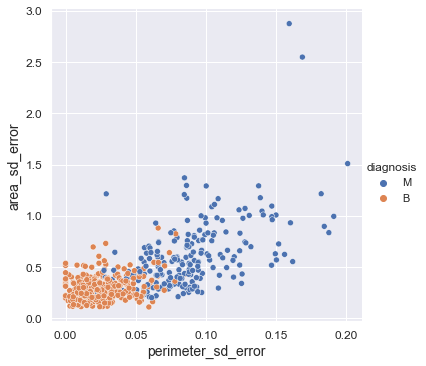

In [76]:
sns.relplot(x="perimeter_sd_error", y="area_sd_error", hue="diagnosis", data=df_breast)

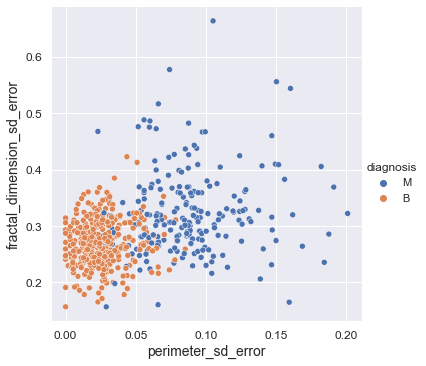

In [71]:
sns.relplot(x="perimeter_sd_error", y="fractal_dimension_sd_error", hue="diagnosis", data=df_breast)

sns.relplot(x="perimeter_sd_error", y="fractal_dimension_mean", hue="diagnosis", data=df_breast)

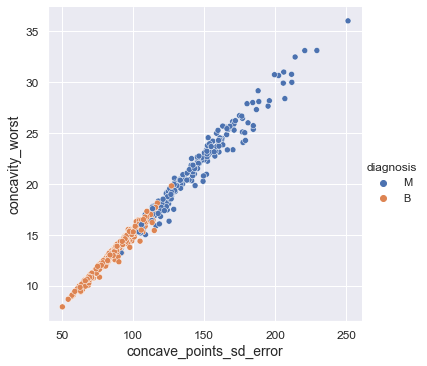

In [40]:
sns.relplot(x="concave_points_sd_error", y="concavity_worst", hue="diagnosis", data=df_breast)

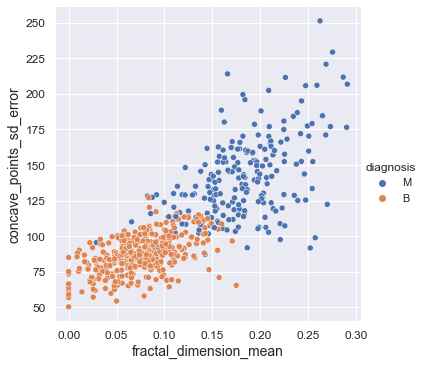

In [41]:
sns.relplot(y="concave_points_sd_error", x="fractal_dimension_mean", hue="diagnosis", data=df_breast)

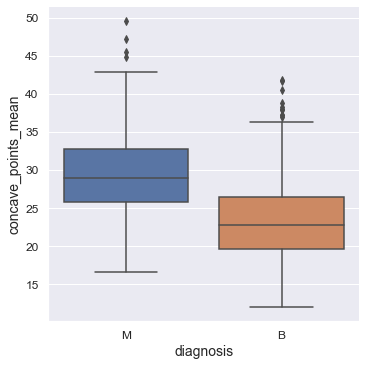

In [77]:
sns.catplot(x="diagnosis", y="concave_points_mean", kind="box", data=df_breast)

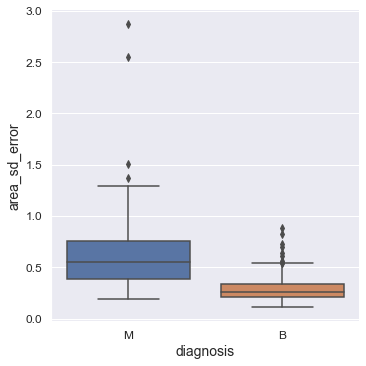

In [78]:
sns.catplot(x="diagnosis", y="area_sd_error", kind="box", data=df_breast)

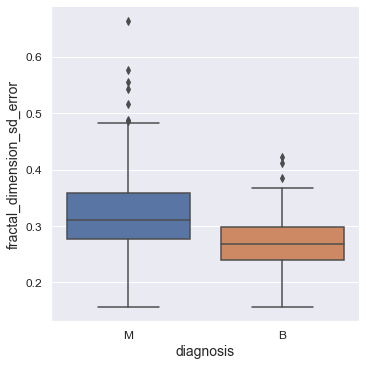

In [79]:
sns.catplot(x="diagnosis", y="fractal_dimension_sd_error", kind="box", data=df_breast)

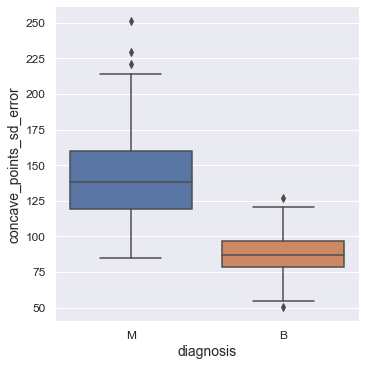

In [42]:
sns.catplot(x="diagnosis", y="concave_points_sd_error", kind="box", data=df_breast)

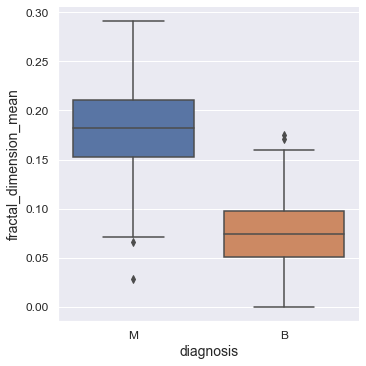

In [43]:
sns.catplot(x="diagnosis", y="fractal_dimension_mean", kind="box", data=df_breast)

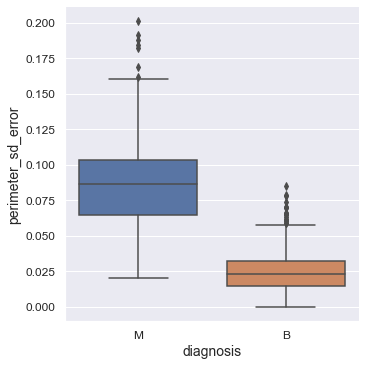

In [44]:
sns.catplot(x="diagnosis", y="perimeter_sd_error", kind="box", data=df_breast)

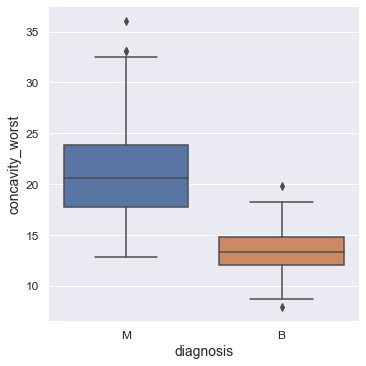

In [45]:
sns.catplot(x="diagnosis", y="concavity_worst", kind="box", data=df_breast)

From the boxplot analysis, I have decided to go with 'concave_points_sd_error' , 'fractal_dimension_mean', and 'concavity_worst'  because based on boxplot analysis ,they have small amount of outliers. Hence, it won't affect our model that much.

# Data Modelling

## Build a model

Split data for training and test

In [83]:
# Split dataset into features and labels
X=breast_corr[['concave_points_sd_error', 'fractal_dimension_mean','concavity_worst']]
y=breast_corr['tumor']                                       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) #70% test data

### Method 1: by using Random Forest Classifier

Train the model on the training set and perform predictions on the test set.

In [84]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
# clf=RandomForestClassifier(n_estimators=100)


In [95]:
clf = RandomForestClassifier(n_estimators=50)

In [101]:
#Train the model using the training sets rfc_predict=clf.predict(X_test)
clf.fit(X_train,y_train)

rfc_predict=clf.predict(X_test)

After training, check the accuracy using actual and predicted values.

In [97]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9197994987468672


#### To control the model overfitting

In [98]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

Check the AUC Score(Area Under the ROC Curve)

In [102]:
rfc_cv_score = cross_val_score(clf, X, y, cv=10, scoring='roc_auc')

In [103]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[240  22]
 [ 10 127]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94       262
         1.0       0.85      0.93      0.89       137

    accuracy                           0.92       399
   macro avg       0.91      0.92      0.91       399
weighted avg       0.92      0.92      0.92       399



=== All AUC Scores ===
[0.995 0.934 0.991 0.966 0.996 0.999 0.961 0.995 0.991 0.997]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.9823337112622827


Tuning Hyperparameters to control overfitting

By using RandomizedSearchCV

In [104]:
from sklearn.model_selection import RandomizedSearchCV

In [105]:
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

In [106]:
# number of features at every split
max_features = ['auto', 'sqrt']

In [107]:
# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)

In [108]:
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }

In [110]:
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [111]:
# Fit the model
rfc_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    max_depth=5,
                                                    n_estimators=50, n_jobs=-1,
                                                    random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [100, 140, 180, 220, 260,
                                                      300, 340, 380, 420, 460,
                                                      500, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [112]:
# print results
print(rfc_random.best_params_)

{'n_estimators': 1000, 'max_features': 'auto', 'max_depth': 140}


In [117]:
#generate a better model
rfc = RandomForestClassifier(n_estimators=1000, max_features='auto', max_depth=140)

In [118]:
#train the model
rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)

In [119]:
#check the roc auc score again
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')

In [120]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[239  23]
 [ 10 127]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.96      0.91      0.94       262
         1.0       0.85      0.93      0.89       137

    accuracy                           0.92       399
   macro avg       0.90      0.92      0.91       399
weighted avg       0.92      0.92      0.92       399



=== All AUC Scores ===
[0.996 0.931 0.989 0.968 0.995 0.999 0.958 0.993 0.995 0.997]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.9821389060674776


Hence, for controlling the model overfitting in Random Forest , I used the Hyperparameter Tuning.

### Method 2: by using Naive Bayes

In [121]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

Controlling the overfitting in Bayes Theorem:

There is one hyperparameter in Naive Bayes is alpha
When alpha is too small it leads to overfitting.
when alpha is too large it leads to underfitting because of the likelihood probabilities become uniform distribution we can say the new data point belongs to which class.

In [126]:
y_pred_train = gnb.predict(X_train)
y_pred_train

array([0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.])

In [128]:
from sklearn.metrics import accuracy_score

In [129]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9294


Check for overfitting or underfitting:

In [130]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.9294
Test set score: 0.9424


The training-set accuracy score is 0.9294 while the test-set accuracy to be 0.9424. These two values are quite comparable. So, there is no sign of overfitting.

In [122]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9423558897243107


Check the AUC Score(Area Under the ROC Curve):

In [123]:
rfc_cv_score = cross_val_score(clf, X, y, cv=10, scoring='roc_auc')

In [125]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Naive Bayes: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[245  17]
 [  6 131]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96       262
         1.0       0.89      0.96      0.92       137

    accuracy                           0.94       399
   macro avg       0.93      0.95      0.94       399
weighted avg       0.94      0.94      0.94       399



=== All AUC Scores ===
[0.995 0.934 0.991 0.966 0.996 0.999 0.961 0.995 0.991 0.997]


=== Mean AUC Score ===
Mean AUC Score - Naive Bayes:  0.9823337112622827


## Explanation

To technical audience:

There are few limitations to my analysis. First, the features that I selected for the model training were not sufficient to build a good model.

Next, the data size for my model training is too small to tell whether my model is good or not. 

To Non-technical Audiences:

On how my analysis works:

1. I choose the 3 of the features that I assumed that were contributed to identification of malignant tumor. My assumptions for feature selection are supported by using the pearsons correlation, and coefficient calculation. I also did the boxplot data analysis to the features to further support my statement.
2. With the 3 features that I selected, I build two models to classify the tumor between malignant tumor and benign tumor.
3. My first model managed to achieve the accuracy of 98% approximately.
4. My second model managed to achieve the accuracy of 98% approximately as well.
5. Hence, my assumptions are strong to say that 'concave_points_sd_error', 'fractal_dimension_mean','concavity_worst' are the factors that contributed to malignant vs benign tumor identification.